In [1]:
!pip3 install yfinance
!pip3 install pandas_datareader
!pip3 install plotly
!pip3 install mplfinance

! pip install pyportfolioopt

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


import scipy.stats as si
import sympy as sy
from sympy.stats import Normal, cdf
from sympy import init_printing
init_printing()

import yfinance as yf
import mplfinance as mpf


from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from scipy.optimize import minimize

import pandas_datareader.data as web
import datetime as dt
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
import plotly.graph_objects as go
from numpy import random ; from random import randint
from matplotlib import cm


In [8]:
msft = yf.Ticker('MSFT')
msft.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company operates in three segments: Productivity and Business Processes, Intelligent Cloud, and More Personal Computing. The Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, Microsoft Viva, and Skype for Business; Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. The Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related Client Access Licenses; GitHub that provides a collaboration platform and code hosting service for developers; Nuance provides healthcare and enterprise AI solutions; and Azure, a cloud platform. It also offers enterprise support, Microsoft consulting

In [ ]:
apple = yf.Ticker('aapl')
apple.actions
apple.dividends
apple.splits

In [15]:
filename='NASDAQ_20220401.txt'

In [22]:
start = dt.datetime(2007,1,1)
end = dt.datetime.now()
icdencoding = pd.read_table(filename,header=None,delimiter=",",skiprows=1)
icdencoding[0]
for i in icdencoding[0]:
    if i == 'AMZN':
        df= web.DataReader(i,'yahoo',start,end)
print(df)

                  High         Low        Open       Close       Volume  \
Date                                                                      
2007-01-03    1.953000    1.902500    1.934000    1.935000  248102000.0   
2007-01-04    1.957000    1.913000    1.929500    1.945000  126368000.0   
2007-01-05    1.939500    1.880000    1.936000    1.918500  132394000.0   
2007-01-08    1.915500    1.858500    1.911000    1.875000  135660000.0   
2007-01-09    1.903000    1.867000    1.880000    1.889000  114060000.0   
...                ...         ...         ...         ...          ...   
2022-07-25  123.639999  120.029999  122.699997  121.139999   50221300.0   
2022-07-26  118.150002  114.529999  115.790001  114.809998   67075100.0   
2022-07-27  121.900002  117.160004  117.309998  120.970001   61582000.0   
2022-07-28  122.839996  118.080002  121.570000  122.279999   82245500.0   
2022-07-29  137.649994  132.410004  134.899994  134.949997  148715600.0   

             Adj Close  

In [24]:
symbols = get_nasdaq_symbols()
symbols.loc['IBM']

Nasdaq Traded                                                    True
Security Name       International Business Machines Corporation Co...
Listing Exchange                                                    N
Market Category                                                      
ETF                                                             False
Round Lot Size                                                  100.0
Test Issue                                                      False
Financial Status                                                  NaN
CQS Symbol                                                        IBM
NASDAQ Symbol                                                     IBM
NextShares                                                      False
Name: IBM, dtype: object

In [44]:
stock = 'MSFT'
start = dt.datetime(2019,1,1)
df = web.DataReader(stock,data_source='yahoo',start=start)

In [45]:
graph = {
    'x':df.index,
    'open':df.Open,
    'close':df.Close,
    'high':df.High,
    'close':df.Close,
    'type':'candlestick',
    'name':'MSFT',
    'showlegend': True
}

In [46]:
layout = go.Figure(
    data=[graph],
    layout_title='Microsoft Stock'
)


In [47]:
layout

In [48]:
start = dt.datetime(2019,1,1)
end = dt.datetime(2019,2,1)

In [50]:
snp_data = web.DataReader('SP500','fred',start,end)
snp_data

,SP500
DATE,
2019-01-01,NaN
2019-01-02,2510.03
2019-01-03,2447.89
2019-01-04,2531.94
2019-01-07,2549.69
2019-01-08,2574.41
2019-01-09,2584.96
2019-01-10,2596.64
2019-01-11,2596.26


In [52]:
start = dt.datetime(2008,1,1)
end = dt.datetime(2018,1,1)
gdp = web.DataReader('GDP','fred',start,end)
gdp.head()

,GDP
DATE,
2008-01-01,14706.538
2008-04-01,14865.701
2008-07-01,14898.999
2008-10-01,14608.208
2009-01-01,14430.901


In [55]:
gdp['shift'] = gdp['GDP'].shift(1)
gdp['Growth'] = gdp['GDP'] - gdp['GDP'].shift(1)
gdp

,GDP,Growth,shift
DATE,,,
2008-01-01,14706.538,NaN,NaN
2008-04-01,14865.701,159.163,14706.538
2008-07-01,14898.999,33.298,14865.701
2008-10-01,14608.208,-290.791,14898.999
2009-01-01,14430.901,-177.307,14608.208
2009-04-01,14381.236,-49.665,14430.901
2009-07-01,14448.882,67.646,14381.236
2009-10-01,14651.248,202.366,14448.882
2010-01-01,14764.611,113.363,14651.248


[*********************100%***********************]  1 of 1 completed


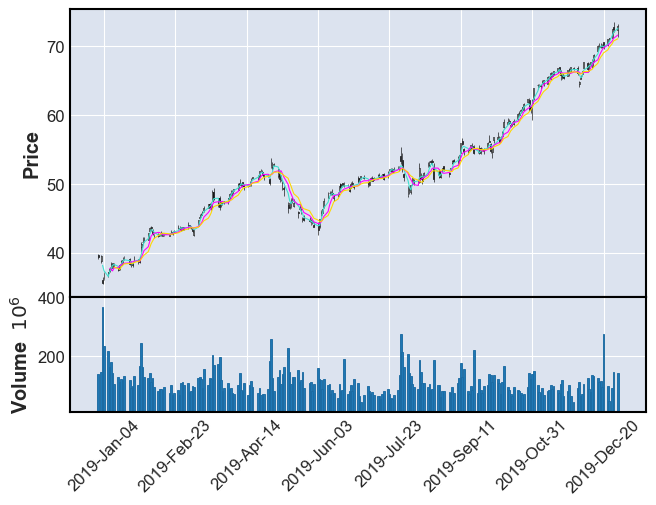

In [59]:
startdate = dt.datetime(2019,1,1)
enddate = dt.datetime(2019,12,31)
data = yf.download('AAPL',start=startdate,end=enddate)
mpf.plot(data,type='candle',mav=(3,6,9),volume=True,show_nontrading=True)

In [61]:
msft = yf.Ticker('MSFT')
msft.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 221000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company operates in three segments: Productivity and Business Processes, Intelligent Cloud, and More Personal Computing. The Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, Microsoft Viva, and Skype for Business; Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. The Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related Client Access Licenses; GitHub that provides a collaboration platform and code hosting service for developers; Nuance provides healthcare and enterprise AI solutions; and Azure, a cloud platform. It also offers enterprise

In [62]:
msft.info['fullTimeEmployees']

In [63]:
msft.info['phone']

'425 882 8080'

In [ ]:
msft.info['sector']